In [39]:
import pandas as pd
import re
import math
import seaborn as sns
kevinn1999

In [40]:
import json
path = '/Users/Dennis/data_science/python/ptt_data/Insurance1800.json'
with open(path) as f:
        data = json.load(f)
data

[{'Author': 'Turnelife',
  'Title': '[險種] 24歲男 保單檢視以及保單規劃',
  'Content': '\n一、性別：男\n\n二、年齡：24\n\n三、職業/工作內容：監工\n\n四、保障需求：癌症=重大疾病>殘扶>醫療>壽險\n\n五、保費預算：年繳3萬6以內\n\n六、健康告知：\n    (1) 最近２個月內是否曾因受傷或生病接受醫師治療、診療或用藥？\n        無\n    (2) 過去２年內是否曾因接受健康檢查有異常情形而被建議接受其他檢查或治療？\n        無\n    (3) 過去５年內是否曾因受傷或生病住院治療７日以上？\n        無\n    (4) 是否已確知懷孕？如是，已經幾週？（女性回答）\n    (5) 過去５年內是否曾因患有下列疾病而接受醫師治療、診療或用藥？\n        (心血管疾病/腦血管疾病/肺部疾病/肝臟疾病/腎臟疾病/甲狀腺疾病/精神疾病)\n        無\n    (6) 過去１年內是否曾因患有下列疾病，而接受醫師治療、診療或用藥？\n        (胃部疾病/肝臟疾病/呼吸器官疾病/眼疾/婦女病)\n        無\n    (7) 目前身體機能是否有失明、聾啞及言語、咀嚼、四肢機能障害？\n        無\n    (8)（成人）BMI 是否不在下列範圍：BMI＝16.5～28\n       （兒童）生長曲線百分位 是否不在下列範圍：3%以上\n        是\n\n七、常用交通工具：汽車(vios)    偶爾火車\n\n八、預計規劃：癌症=重大疾病>殘扶>醫療>壽險\n\n九、現有保險：\n保險公司：國泰人壽\n購買時間：104年中\n\n商品名稱                          [英文代號]      保額/計畫   期間      保費\n\n國泰新真安心住院醫療終身保險            FV           1000元   20年     10860元\n\n國泰新全方位傷害保險附約_死殘           CF           110萬元           1299元\n\n國泰新全方位傷害保險附約_傷害醫療日額   CG           2000元            

In [75]:
s = re.search(r'(\[..\]) (\d+歲男) (\D+)' , data[0]['Title'])
s.group(1)
content = data[0]['Content'].replace('\n' , '')
content

'一、性別：男二、年齡：24三、職業/工作內容：監工四、保障需求：癌症=重大疾病>殘扶>醫療>壽險五、保費預算：年繳3萬6以內六、健康告知：    (1) 最近２個月內是否曾因受傷或生病接受醫師治療、診療或用藥？        無    (2) 過去２年內是否曾因接受健康檢查有異常情形而被建議接受其他檢查或治療？        無    (3) 過去５年內是否曾因受傷或生病住院治療７日以上？        無    (4) 是否已確知懷孕？如是，已經幾週？（女性回答）    (5) 過去５年內是否曾因患有下列疾病而接受醫師治療、診療或用藥？        (心血管疾病/腦血管疾病/肺部疾病/肝臟疾病/腎臟疾病/甲狀腺疾病/精神疾病)        無    (6) 過去１年內是否曾因患有下列疾病，而接受醫師治療、診療或用藥？        (胃部疾病/肝臟疾病/呼吸器官疾病/眼疾/婦女病)        無    (7) 目前身體機能是否有失明、聾啞及言語、咀嚼、四肢機能障害？        無    (8)（成人）BMI 是否不在下列範圍：BMI＝16.5～28       （兒童）生長曲線百分位 是否不在下列範圍：3%以上        是七、常用交通工具：汽車(vios)    偶爾火車八、預計規劃：癌症=重大疾病>殘扶>醫療>壽險九、現有保險：保險公司：國泰人壽購買時間：104年中商品名稱                          [英文代號]      保額/計畫   期間      保費國泰新真安心住院醫療終身保險            FV           1000元   20年     10860元國泰新全方位傷害保險附約_死殘           CF           110萬元           1299元國泰新全方位傷害保險附約_傷害醫療日額   CG           2000元            1780元國泰新全方位傷害保險附約_傷害醫療限額   CH           5萬元             550元國泰永康住院日額健康保險附約            CQ           1000元            1480元國泰新真全意住院醫療健康保險附約        CV           M10計劃

In [135]:
re.search(r'(年齡：\d+)' ,content)
re.search(r'(?<=性別：)\w+',content)
# re.search(r'保費預算：\w+' , content)
# re.search(r'健康告知：\w+' , content)
# ks = re.findall(r'(?<=是否不在下列範圍：)\w+' , content)

<re.Match object; span=(5, 7), match='男二'>

In [2]:
def decide_budget(content):
    ans = re.findall(r"\d+\.?\d*",content[content.find('算'):content.find('六')][2:])
    if len(ans)>0:
        return ans[0]
    else:
        return 0
def check_need(total_need):
    med_need = 0
    cancer_need = 0
    acc_need = 0
    dis_need = 0
    age_need = 0
    big_need = 0
    insure = 1
    if total_need.find('療')>0:
        med_need = 1
    if total_need.find('癌')>0:
        cancer_need = 1
    if total_need.find('外')>0:
        acc_need = 1
    if total_need.find('失')>0:
        dis_need = 1
    if total_need.find('壽')>0:
        age_need = 1
    if total_need.find('重')>0:
        big_need = 1
    if total_need.find('支')>0:
        insure = 1
    return [med_need , cancer_need , acc_need , dis_need,age_need , big_need,insure]

def check_buy(content):
    company = ''
    if content == '':
        return '無'
    company_list = ['遠雄','富邦','國泰','全球','南山','臺銀','台灣','中國','保誠','華','新光','德信','寶人','三','幸福','朝陽','宏泰','安聯','元大','第一','合作','康健人壽','友邦','法巴黎','商安','蘇黎世']
    for insurance_company in company_list:
        if content.find(insurance_company)>0:
            company = insurance_company + '-'
    return company
def filter_num(num):
    number = ''
    for s in num:
        if s.isdigit():
            number = number + s
    return int(number)

In [6]:
import json
path = '/Users/Dennis/data_science/python/ptt_data/Insurance1800.json'
with open(path) as f:
        data = json.load(f)
first_time = True
for i in range(1,len(data)-1):
    author = data[i]['Author']
    title = data[i]['Title'][data[i]['Title'].find(']'):][1:].strip()
    kind = data[i]['Title'][data[i]['Title'].find('['):data[i]['Title'].find(']')][1:]
    content = data[i]['Content']
    res_num = len(data[i]['Responses'])
    content = content.replace('\n' , '').strip()
    gender = content[content.find('別'):content.find('二')][2:]
    age = content[content.find('齡'):content.find('三')][2:]
    if age != '':
        age = filter_num(age)
    job = content[content.find('容'):content.find('四')][2:]
    transportation = content[content.find('具'):content.find('八')][2:]
 #   budget = content[content.find('算'):content.find('六')][2:]
    budget = decide_budget(content)
    col_names = ['author' , 'kind' , 'title' , 'res_num' , 'gender' , 'age' , 'job','transportation','C_buy','budget','med_N','can_N' , 'acc_N' , 'dis_N','long_N','big_N','ins_N']
    total_need = content[content.find('求'):content.find('五')][2:]
    current_buy = content[content.find('現'):content.find('十')][5:]
    checked = check_need(total_need=total_need)
    # potential_need  = content[content.find('具'):content.find('八')][2:]
    # potential = check_need(potential_need)
    df = pd.DataFrame([author , kind ,title , res_num , gender , age , job ,transportation,current_buy,budget,checked[0] , checked[1] , checked[2],checked[3],checked[4],checked[5],checked[6]]).T
    df.columns = col_names
    if first_time:
        df1 =df
    else:
        df1 =  df1.append(df)
    first_time = False

In [7]:
#with open('' , encoding='utf-8') as f:
import json
from pprint import pprint
times = 1
collect_time = [times]
wrong= 0
for t in range(1801,1905):
    t = str(t)
    path = '/Users/Dennis/data_science/python/ptt_data/Insurance'+ t+'.json'
    with open(path) as f:
        data = json.load(f)
    for i in range(0,len(data)-1):
        try:
            author = data[i]['Author']
            title = data[i]['Title'][data[i]['Title'].find(']'):][1:].strip()
            kind = data[i]['Title'][data[i]['Title'].find('['):data[i]['Title'].find(']')][1:]
            content = data[i]['Content']
            res_num = len(data[i]['Responses'])
            content = content.replace('\n' , '').strip()
            gender = content[content.find('別'):content.find('二')][2:]
            age = content[content.find('齡'):content.find('三')][2:]
            age = filter_num(age)
            job = content[content.find('容'):content.find('四')][2:]
            transportation = content[content.find('具'):content.find('八')][2:]
            budget = decide_budget(content)
            col_names = ['author' , 'kind' , 'title' , 'res_num' , 'gender' , 'age' , 'job','transportation','C_buy','budget','med_N','can_N' , 'acc_N' , 'dis_N','long_N','big_N','ins_N']
            total_need = content[content.find('求'):content.find('五')][2:]
            current_buy = content[content.find('現'):content.find('十')][5:]
            current_buy = check_buy(current_buy)
            checked = check_need(total_need=total_need)
            # potential_need  = content[content.find('具'):content.find('八')][2:]
            # potential = check_need(potential_need)
            df = pd.DataFrame([author , kind ,title , res_num , gender , age , job ,transportation,current_buy,budget,checked[0] , checked[1] , checked[2],checked[3],checked[4],checked[5],checked[6]]).T
            df.columns = col_names
            df1 = df1.append(df)
            times +=1
            collect_time.append(times)
        except:
            wrong +=1
print('格式錯誤的文章出現了{}篇'.format(wrong))

格式錯誤的文章出現了766篇


In [8]:
index_ls = []
for i in range(len(df1)):
    index_ls.append(i)
df1.index = index_ls
df1.tail()

,author,kind,title,res_num,gender,age,job,transportation,C_buy,budget,med_N,can_N,acc_N,dis_N,long_N,big_N,ins_N
1219,dada90270,險種,31歲男 醫療險規劃/國泰,8,男,31,化工場機械助理,,無,20000,0,1,1,0,0,0,1
1220,loafe,險種,[醫療/重疾] 40歲男 既有保單檢視,4,男,40,科技業內勤九、現有保險：我承認之前沒有做功課下 買了富邦的終身重疾想想實在保費貴了點目前想把...,,富邦-,0,0,0,0,0,0,0,1
1221,adou0327,險種,37歲女 既有保單檢視,4,女,37,內勤客服,大眾運輸/機車,台灣-,0,0,0,0,0,0,0,1
1222,saintred,險種,35歲男 既有保單及新保單檢視,0,男,35,工程師,汽車,友邦-,6,0,1,1,0,0,0,1
1223,appter987,險種,32歲女既有保單檢視,18,女,32,工廠勞安,,無,0,0,0,0,0,0,0,1


In [9]:
df = df1
filt = df['age']!='' 
df = df[filt]
df.reset_index(drop = True).head()

,author,kind,title,res_num,gender,age,job,transportation,C_buy,budget,med_N,can_N,acc_N,dis_N,long_N,big_N,ins_N
0,ake520,險種,30歲女 第一次保單規畫,9,女,30,,機車,無,2,1,0,0,0,0,1,1
1,tim60315,險種,0歲男 新生兒罐頭保單規劃,6,男,1,（請詳細填寫實際工作內容，以利判斷職業等級）,,,0,0,0,0,0,0,0,1
2,pipiboy1980,討論,全球和元大實支選擇,12,,8180111990,,,個比較和搭配，覺得很猶豫-----Sent from JPTT on my LGE LG-H...,0,0,0,0,0,0,0,1
3,nina360,險種,0歲女 新生兒保單規劃,17,女,0,無,汽車座椅,,15000,1,1,0,0,0,0,1
4,se2422,討論,富邦團保年齡上限,2,,655965,而年紀可以超過65歲的商品。感謝各位-----Sent from JPTT on my iPad-,,,0,0,0,0,0,0,0,1


In [10]:
df = df[df.age<100]
df.age = df.age.astype(int)
df.med_N = df.med_N.astype(int)
df.can_N = df.can_N.astype(int)
df.acc_N = df.acc_N.astype(int)
df.dis_N = df.dis_N.astype(int)
df.long_N = df.long_N.astype(int)
df.big_N = df.big_N.astype(int)
df.ins_N = df.ins_N.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 1223
Data columns (total 17 columns):
author            1175 non-null object
kind              1175 non-null object
title             1175 non-null object
res_num           1175 non-null object
gender            1175 non-null object
age               1175 non-null int64
job               1175 non-null object
transportation    1175 non-null object
C_buy             1175 non-null object
budget            1175 non-null object
med_N             1175 non-null int64
can_N             1175 non-null int64
acc_N             1175 non-null int64
dis_N             1175 non-null int64
long_N            1175 non-null int64
big_N             1175 non-null int64
ins_N             1175 non-null int64
dtypes: int64(8), object(9)
memory usage: 165.2+ KB


In [11]:
condition2 = 35 > df['age']
data_length = len(df)
TA_length = len(df[condition2])
TA_ratio = TA_length/data_length
print('在PTT insurance的民眾屬於TA比例：',round(TA_ratio,2))

在PTT insurance的民眾屬於TA比例： 0.8


In [12]:
# dic = {}
# dic['醫療'] = df.med_N.value_counts()[1]
# dic['癌症'] = df.can_N.value_counts()[1]
# dic['意外'] = df.acc_N.value_counts()[1]
# dic['失能'] = df.dis_N.value_counts()[1]
# dic['壽險'] = df.long_N.value_counts()[1]
# dic['實支實付'] = df.big_N.value_counts()[1]
print('醫療',df.med_N.value_counts()[1])
print('癌症',df.can_N.value_counts()[1])
print('意外',df.acc_N.value_counts()[1])
print('失能',df.dis_N.value_counts()[1])
print('壽險',df.long_N.value_counts()[1])
print('實支實付',df.big_N.value_counts()[1])

醫療 463
癌症 412
意外 400
失能 69
壽險 52
實支實付 321


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

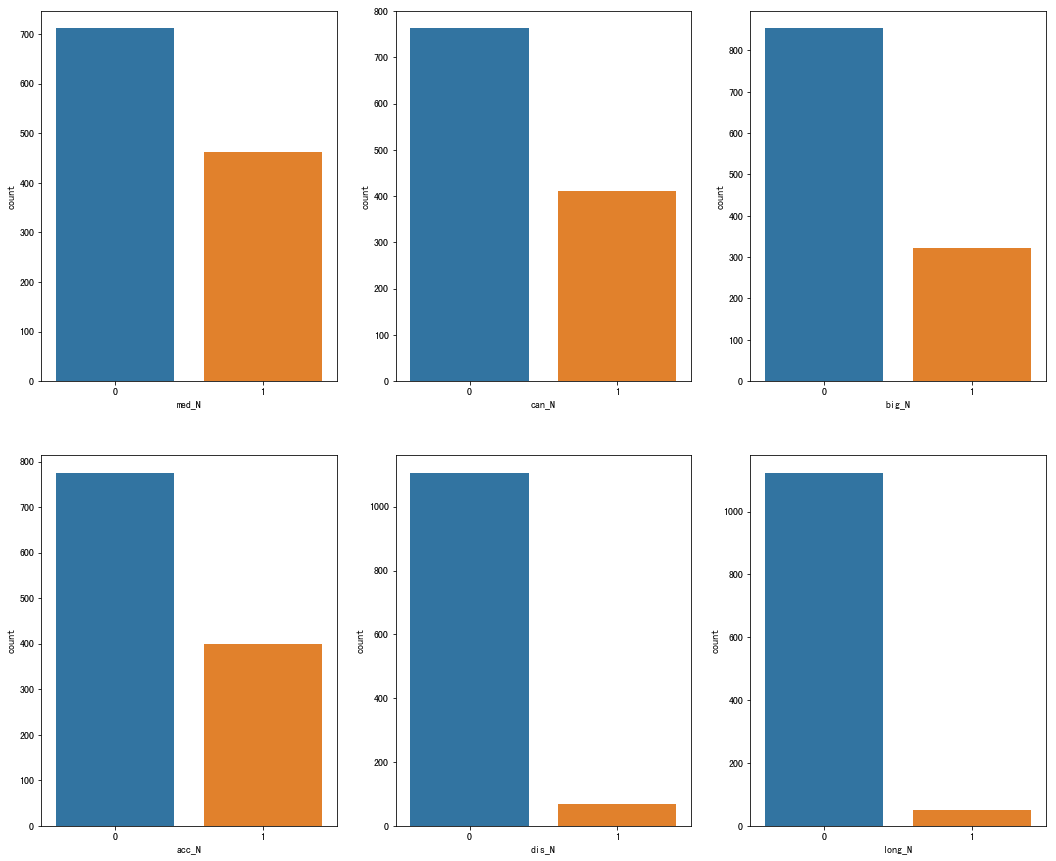

In [14]:
fig,ax = plt.subplots(2,3,figsize = (18,15))
sns.countplot(df.med_N ,ax = ax[0][0])            
sns.countplot(df.can_N ,ax = ax[0][1])            
sns.countplot(df.acc_N ,ax = ax[1][0])            
sns.countplot(df.dis_N ,ax = ax[1][1])            
sns.countplot(df.long_N,ax = ax[1][2])            
sns.countplot(df.big_N ,ax = ax[0][2])            

# 醫療、意外、癌症的需求都頗高，壽險與失能險等偏重較高族群的險在Ptt社群顯然比較不會被拿出來討論

In [15]:
data[0]['Responses'][0]['Content']

' 你預增保險中台壽無法這樣出單，因為總保費沒超過１萬不能'

這些頁面出錯了： [1808, 1809, 1811, 1814, 1816, 1825, 1835, 1843, 1844, 1850, 1850, 1853]


(-0.5, 399.5, 199.5, -0.5)

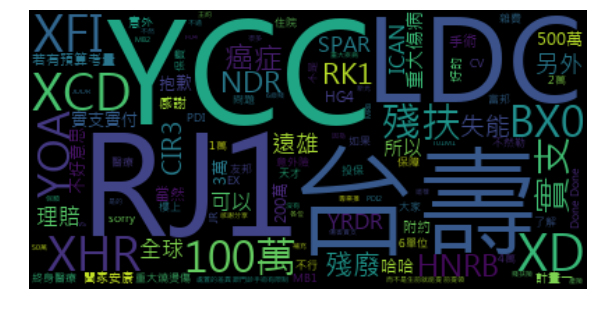

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
title = ''
wrong_page = []
for i in range(1800,1855):
    path = '/Users/Dennis/data_science/python/ptt_data/Insurance'+ str(i) +'.json'
    with open(path) as f:
            data = json.load(f)
    for content in data:
        try:
            for every in content['Responses']:
                title = title + every['Content']
        except:
            wrong_page.append(i)
print('這些頁面出錯了：',wrong_page)
removeword = ['謝謝','5萬','done']
for word in removeword:
    title = title.replace(word , '')
font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

這些頁面出錯了： [1857, 1857, 1862, 1873, 1874, 1876, 1879, 1884, 1892, 1893, 1895, 1899]


(-0.5, 399.5, 199.5, -0.5)

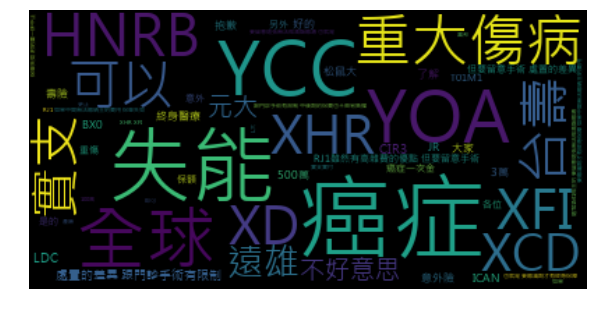

In [17]:
title = ''
wrong_page = []
for i in range(1855,1905):
    path = '/Users/Dennis/data_science/python/ptt_data/Insurance'+ str(i) +'.json'
    with open(path) as f:
            data = json.load(f)
    for content in data:
        try:
            for every in content['Responses']:
                title = title + every['Content']
        except:
            wrong_page.append(i)
removeword = ['謝謝','感謝','5萬']
for word in removeword:
    title = title.replace(word , '')
print('這些頁面出錯了：',wrong_page)
font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [18]:
df.columns
df.gender = df.gender.astype(str)
df.author = df.author.astype(str)
df.kind =  df.kind.astype(str)
df.title = df.title.astype(str)
df.res_num = df.res_num.astype(int)
df.job = df.job.astype(str)
df.transportation = df.transportation.astype(str)
df.C_buy = df.C_buy.astype(str)
df.budget = df.budget.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 1223
Data columns (total 17 columns):
author            1175 non-null object
kind              1175 non-null object
title             1175 non-null object
res_num           1175 non-null int64
gender            1175 non-null object
age               1175 non-null int64
job               1175 non-null object
transportation    1175 non-null object
C_buy             1175 non-null object
budget            1175 non-null float64
med_N             1175 non-null int64
can_N             1175 non-null int64
acc_N             1175 non-null int64
dis_N             1175 non-null int64
long_N            1175 non-null int64
big_N             1175 non-null int64
ins_N             1175 non-null int64
dtypes: float64(1), int64(9), object(7)
memory usage: 205.2+ KB


In [19]:
df.budget = round(df.budget/10000,3)

In [20]:
print('男生',df.gender.value_counts()[0])
print('女生',df.gender.value_counts()[1])

男生 572
女生 539


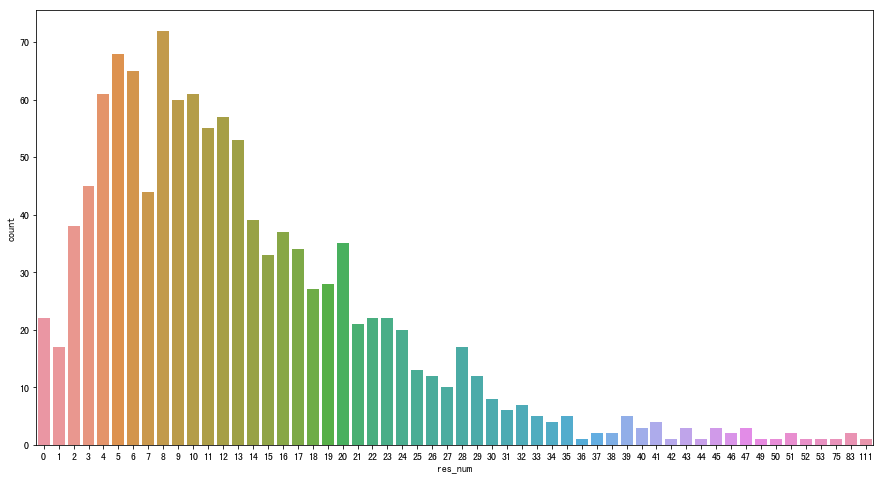

In [21]:
fig = plt.figure(figsize = (15,8))
sns.countplot(df.res_num)

In [22]:
df[df.res_num >=8].head(10)
df[df.res_num >=30]

,author,kind,title,res_num,gender,age,job,transportation,C_buy,budget,med_N,can_N,acc_N,dis_N,long_N,big_N,ins_N
34,frf,險種,0歲男 新生兒保單,40,男,0,無,,無,0.000,0,0,0,0,0,0,1
37,yingch,險種,28歲女 第一份保單規劃/台灣/全球,31,女,28,教,大眾運輸/汽車,,0.000,1,0,1,0,0,1,1
47,a361822a,險種,23歲女 保單規劃,31,女,23,櫃檯行政,機車,富邦-,0.000,1,1,0,0,0,1,1
98,Brave368,險種,0歲男 新生兒保單規劃 全球/南山,33,男,0,無業，吃喝拉撒睡,汽車（安全座椅）,,2.500,1,1,1,0,0,0,1
105,Lev0ph3d,險種,31歲男現有保單檢視,32,男,31,醫療(我和太太都是),,無,0.000,0,0,0,0,0,0,1
111,fsxim211622,險種,富邦和台灣選擇,47,男,35,餐飲,,無,3.500,0,0,0,0,0,0,1
140,masterlynn,險種,25歲女 第一份保單,33,女,25,辦公室職員,,無,0.000,1,1,1,0,0,0,1
156,evillee,險種,32歲女 第一份保單規劃/台壽/全球/友邦,39,女,31,公司業務,,無,0.001,1,1,1,0,0,0,1
158,bornsfor,醫療、意外,27、28/女/新保單規劃/南山,30,女,28,會計,機車,,0.000,1,0,1,0,0,0,1
159,bibiyiyo,險種,32歲男第一份保單檢視,30,男,32,副校長（第一級）,,無,0.001,0,0,0,0,0,0,1


# 新保單規劃最能引起討論，新生兒與30歲的人比較會成為買家

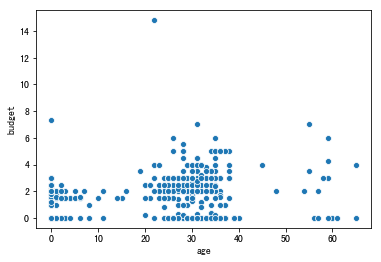

In [23]:
# df[df.budget >10000]['budget'] =  df[df.budget>10000]['budget']/10000
sns.scatterplot(x= df.age , y= df.budget[df.budget>0])

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


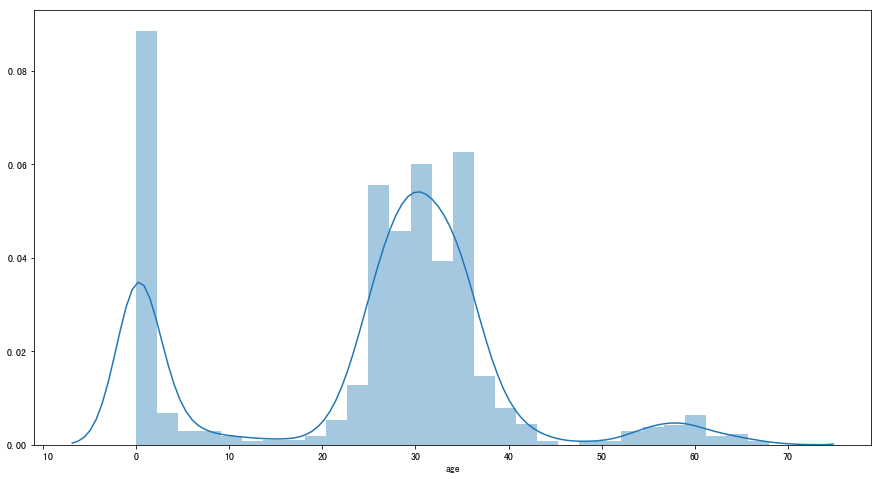

In [24]:
plt.figure(figsize = (15,8))
sns.distplot(df.age)

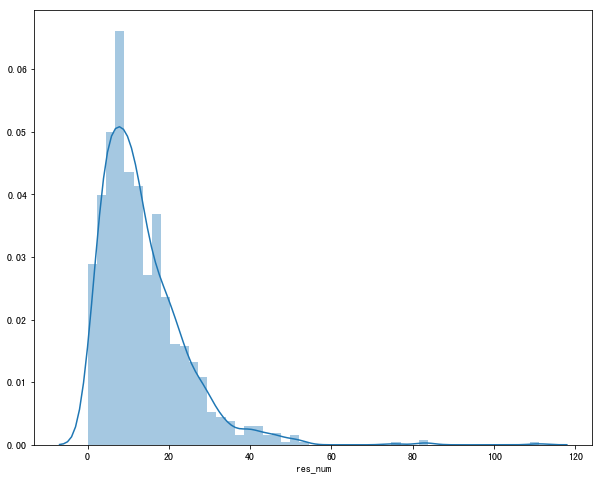

In [25]:
plt.figure(figsize = (10,8))
sns.distplot(df.res_num)

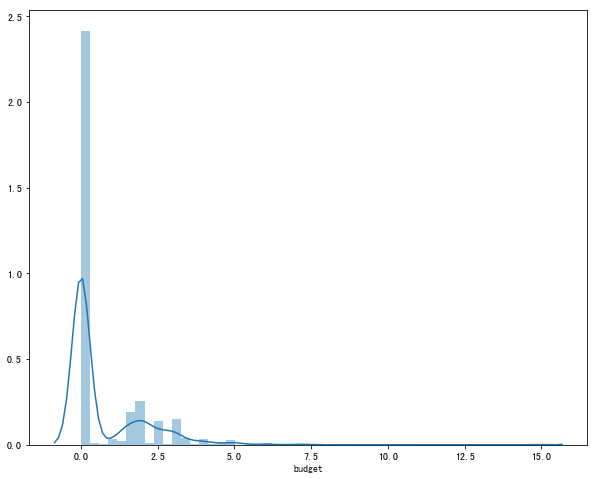

In [26]:
plt.figure(figsize = (10,8))
sns.distplot(df.budget)

0是因為權宜之計填上的，基本上預算大概是1~5萬左右

In [27]:
st=' 郵局安富增值還本終身保險丈夫預計保險規劃台灣人壽福滿人生終身壽險（T02H0） 壽險20 年期10萬附 台灣人壽新住院醫療保險附約（HNRB） 醫療險1 年期計劃三附 台灣人壽一年期一至六級殘扶金健康保險附約（YOA） 殘扶險1 年期2萬附 台灣人壽一年定期殘廢健康保險附約（BX0） 殘廢險1 年期500萬附 台灣人壽重大傷病（CIR3） 重大疾病險1 年期100萬附 台灣人壽（YCC） 癌症險1 年期100萬附 台灣人壽平準型定期壽險附約（LTR） 壽險6 年期90萬附 台灣人壽長安傷害保險附約 (SPAR)一年期50 萬附 台灣人壽年年平安傷害醫療附加條款(一般實支) (SMR2A)一年期3 萬全球人壽全球人壽終身壽險（QWX） 壽險15 年期21萬附 全球人壽醫療費用健康保險附約（XHR） 醫療險1 年期計劃五友邦人壽平安定期壽險（JTL） 壽險10 年期100萬附 友邦人壽'
df = df[df.C_buy!=st]

In [28]:
df2 = df[df.C_buy!='']
df2 = df2[df2.C_buy!='無']

In [38]:
41/241

0.17012448132780084

國泰-    41
三-     39
南山-    31
富邦-    26
新光-    23
中國-    15
友邦-    13
第一-    10
全球-    10
台灣-    10
幸福-     5
元大-     4
華-      3
遠雄-     3
德信-     2
安聯-     2
臺銀-     2
合作-     1
商安-     1
寶人-     1
朝陽-     1
保誠-     1
Name: C_buy, dtype: int64


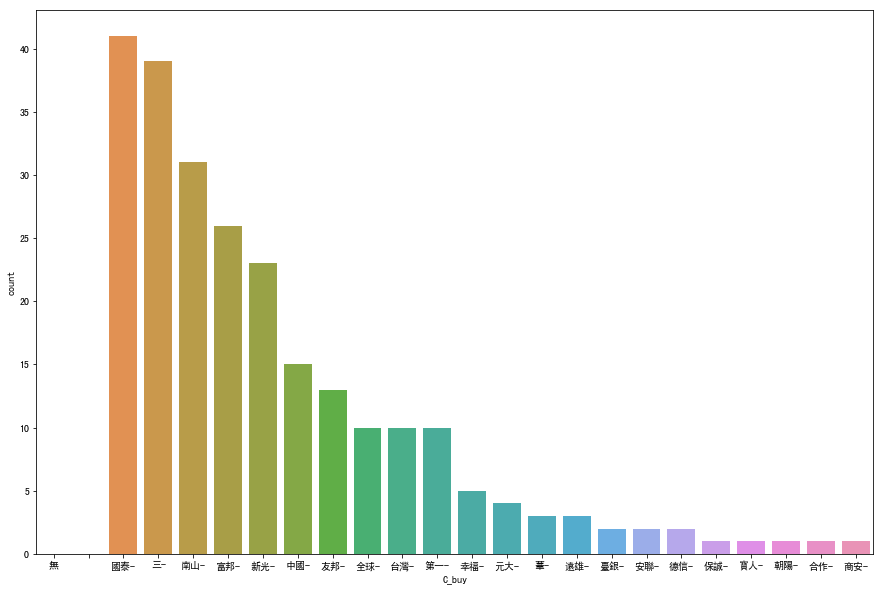

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(df2.C_buy,order = df.C_buy.value_counts().index)
print(df2.C_buy.value_counts())

最大的競爭對手似乎是國泰跟三商美邦，可以觀察他們是怎麼做的。另外全球人壽跟台灣、第一的人數相近，要密切注意這兩家的動向。
接下來的變數因為太多太雜，難以格式化，我們用文字雲觀察：

(-0.5, 399.5, 199.5, -0.5)

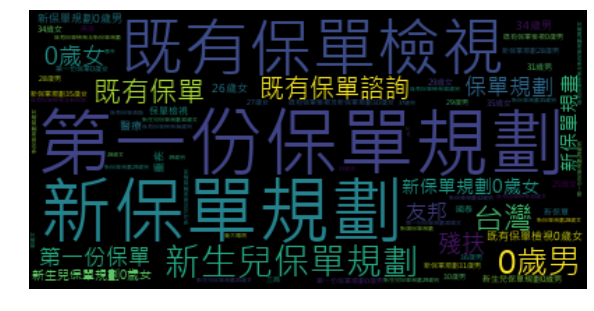

In [34]:
df.title.value_counts()
title = ''
wrong_page = []
for word in df.title:
    title = title + word
removeword = ['謝謝','感謝','5萬' , '富邦','遠雄' ,'台壽' ,'南山','全球']
for word in removeword:
    title = title.replace(word , '')
font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

關鍵字：
* 新保單
* 第一份保單規劃
* 全球 ???
* 新生保單
* 既有保單諮詢
也就是說，我們要注意為什麼有壽險業，大家還會有這些需求？
還有年輕客戶最大的需求就是**需要有人幫他規劃：新生兒 + 自己**
所以可以預期會主動投保的人在這個年齡區間中：
* 有新家庭
* 注意醫療健康，因此要想辦法讓他們取得醫療、全球人壽商品連結

所以我們必須想辦法讓第一次買保險的人都來我們這裡，並且提供令人驚喜、溫暖的規劃方式。
促銷的話可以推銷他連父母一起保，因為愛責任在，讓他除了自己的新家庭也顧到舊家庭。
另外有一點要拿出來討論，就是格式有一個是：「預期規劃」，大部分都跟需求有關，很少人心中對某家公司有定見。
也就是說我們也可以把目標放在：「讓TA的預期規劃就是交給全球人壽」，具體該怎麼做？

(-0.5, 399.5, 199.5, -0.5)

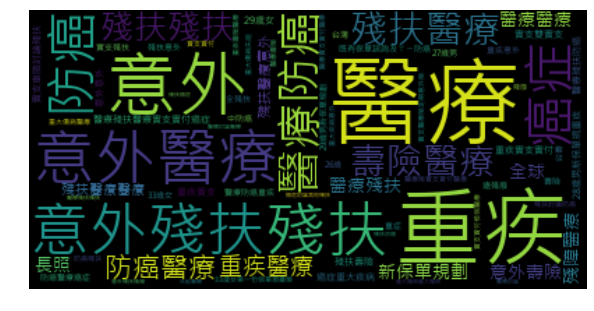

In [307]:
title = ''
wrong_page = []
for word in df.kind:
    title = title + word
removeword = ['謝謝','感謝','險種']
for word in removeword:
    title = title.replace(word , '')
font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

與前面的分析得出一致的結論：
* 人們非常重視醫療險，即使有健保也一樣
* 重視防癌
* 重大疾病不敢忽視

(-0.5, 399.5, 199.5, -0.5)

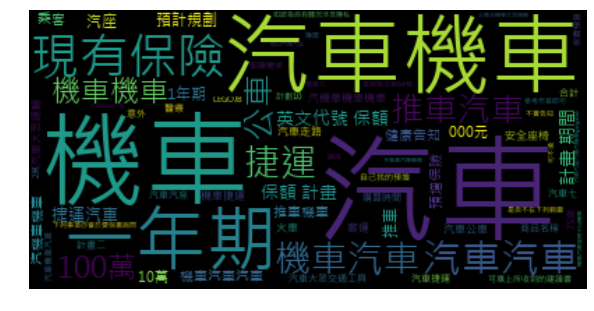

In [311]:
title = ''
wrong_page = []
for word in df.transportation:
    title = title + word
removeword = ['謝謝','感謝','險種','保險公司','20年']
for word in removeword:
    title = title.replace(word , '')
font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

交通到底算不算方便？我們能不能透過常用的
* 機車
* 汽車
* 20年期保單
* 一年期
創造更好的服務呢？甚至以我在爬蟲觀察到的，大家發文有固定的諮詢格式
我們可以在全球人壽的App上簡化這種模式（按鈕按一按迅速描述問題），並說明我們的觀察
不過ptt的不一樣之處就在於他的保險公司來自各家，如果不是買全球人壽商品可以享受這種服務嗎？